# **Logistic Regression**

## Import & Data

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
df = pd.read_csv("pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


---
---
## Veri Düzenlemek
(Feature Engineering)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           742 non-null    int64 
 1   Name        742 non-null    object
 2   Type 1      742 non-null    object
 3   Type 2      368 non-null    object
 4   Total       742 non-null    int64 
 5   HP          742 non-null    int64 
 6   Attack      742 non-null    int64 
 7   Defense     742 non-null    int64 
 8   Sp. Atk     742 non-null    int64 
 9   Sp. Def     742 non-null    int64 
 10  Speed       742 non-null    int64 
 11  Generation  742 non-null    int64 
 12  Legendary   742 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 70.4+ KB


In [56]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [57]:
map_legend = {
    True : 1,
    False : 0
}

In [58]:
df["Legendary"] = df["Legendary"].map(map_legend)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           742 non-null    int64 
 1   Name        742 non-null    object
 2   Type 1      742 non-null    object
 3   Type 2      368 non-null    object
 4   Total       742 non-null    int64 
 5   HP          742 non-null    int64 
 6   Attack      742 non-null    int64 
 7   Defense     742 non-null    int64 
 8   Sp. Atk     742 non-null    int64 
 9   Sp. Def     742 non-null    int64 
 10  Speed       742 non-null    int64 
 11  Generation  742 non-null    int64 
 12  Legendary   742 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 75.5+ KB


In [60]:
df.drop(["#","Name","Type 1","Type 2"], axis= 1, inplace=True)

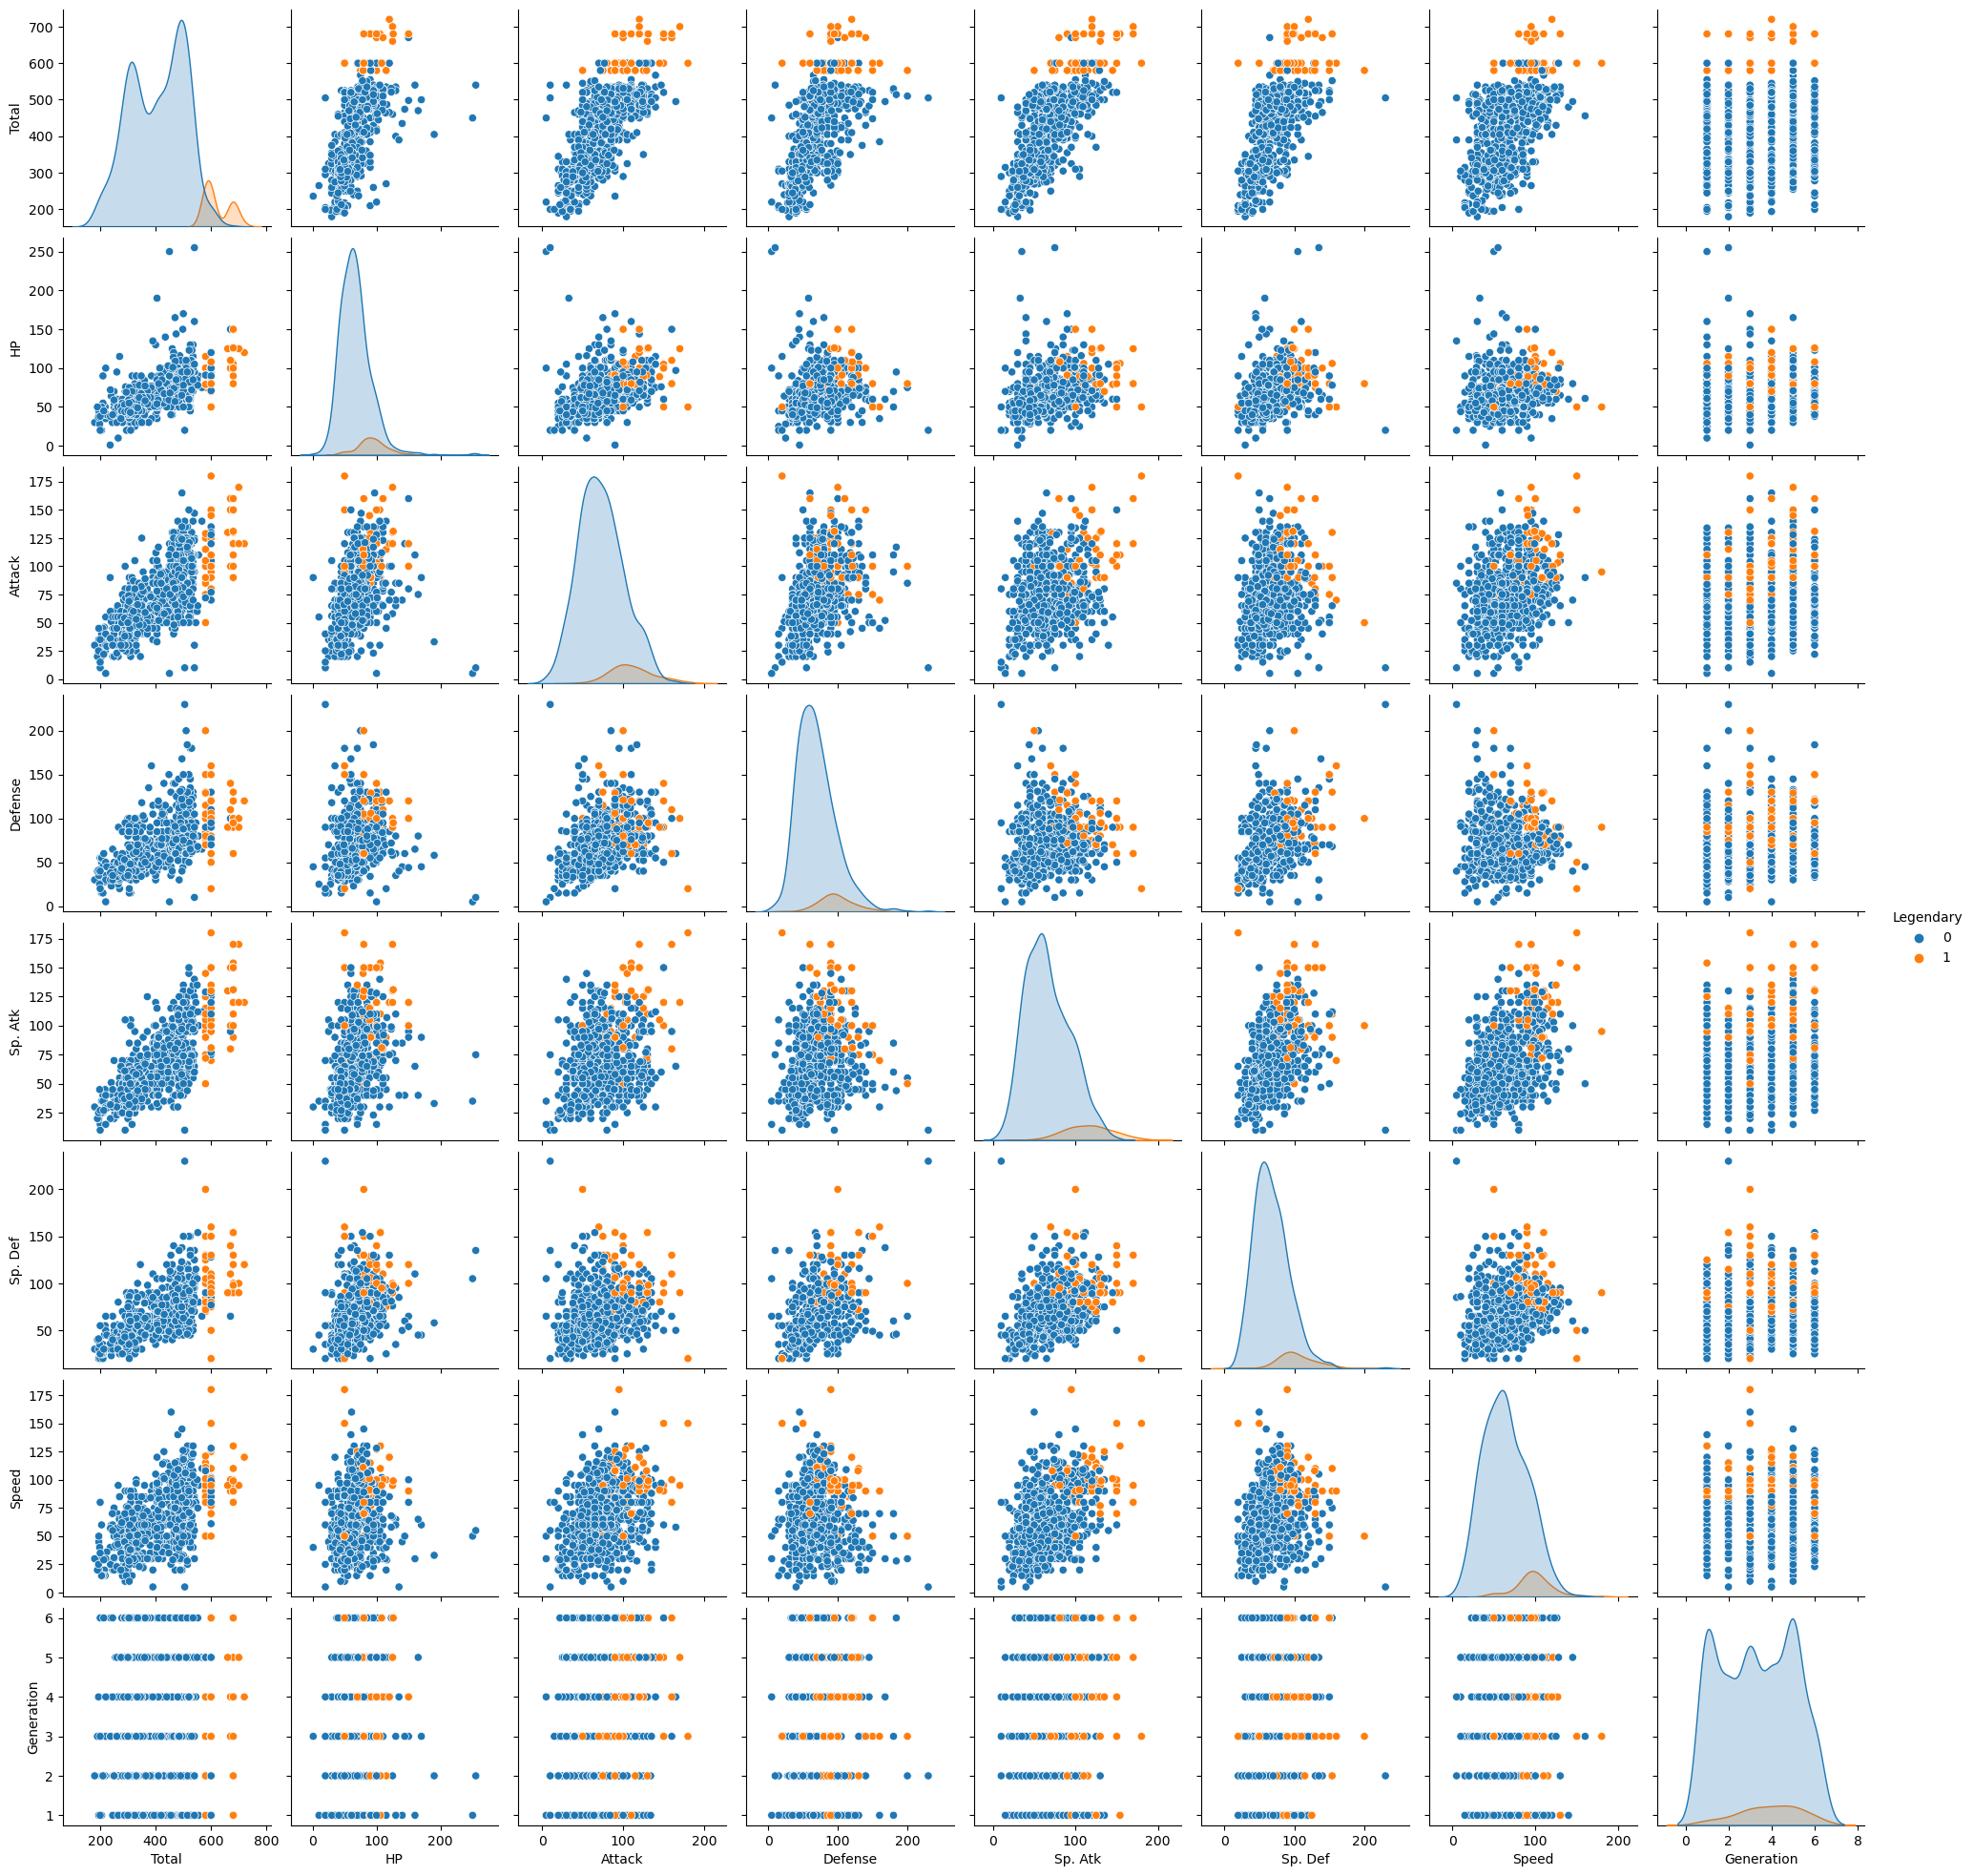

In [61]:
sns.pairplot(df, hue="Legendary");

<AxesSubplot:>

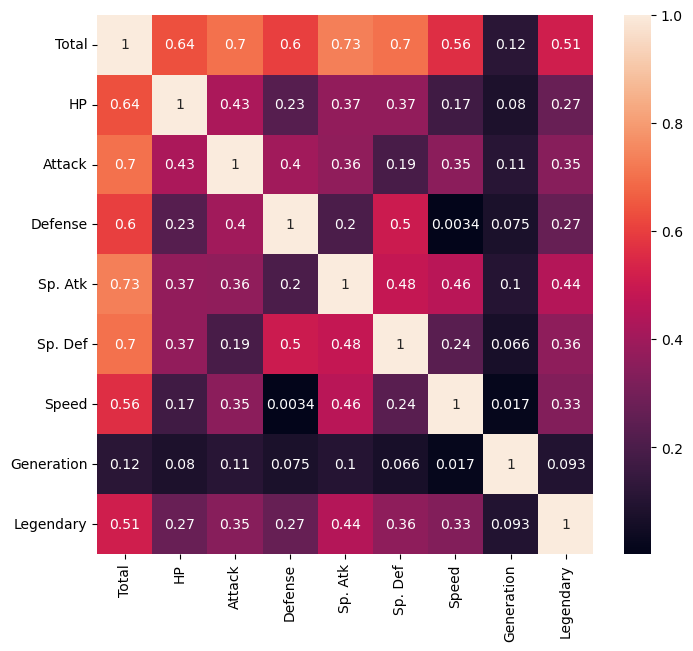

In [62]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Total', ylabel='Legendary'>

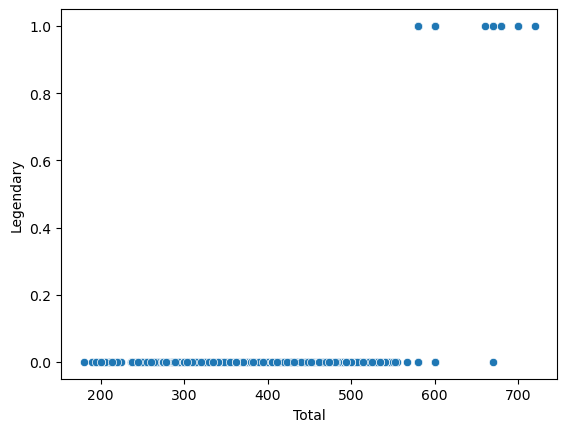

In [63]:
sns.scatterplot(x="Total",y="Legendary", data=df)

<AxesSubplot:xlabel='HP', ylabel='Legendary'>

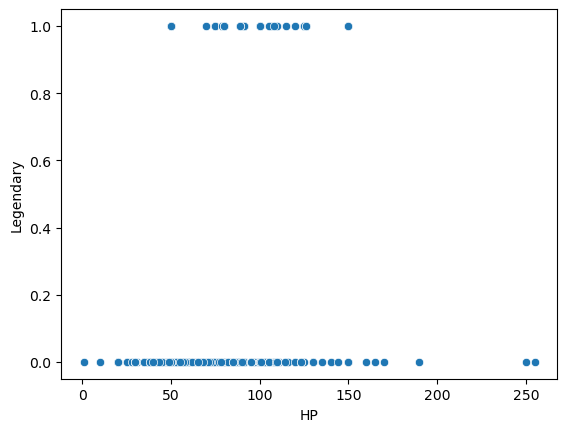

In [64]:
sns.scatterplot(x="HP",y="Legendary", data=df)

---
---
## Train Test Split

In [65]:
X = df.drop("Legendary",axis=1)
y = df["Legendary"]

In [66]:
X.iloc[54:56]

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
54,500,80,82,78,95,80,85,1
55,305,40,80,35,35,45,70,1


In [67]:
y.iloc[147:153]

147    0
148    1
149    0
150    0
151    0
152    0
Name: Legendary, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.3, random_state=9)

In [70]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

---
---
## Lojistik Regresyon Modeli

In [71]:
from sklearn.linear_model import LogisticRegression
# help(LogisticRegression)

In [72]:
log_model = LogisticRegression()

In [73]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [74]:
log_model.coef_

array([[ 1.56442082, -0.19733289,  0.96006044,  1.27674102,  1.44232266,
         1.14089132,  1.44467002, -0.03855335]])

In [75]:
coef = pd.Series(index=X.columns, data=log_model.coef_[0])

In [76]:
coef.sort_values(inplace=True)

<AxesSubplot:>

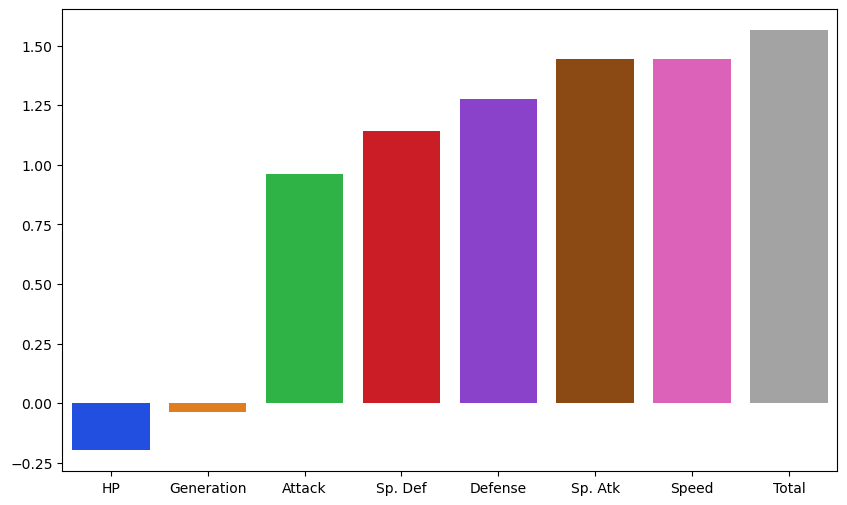

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x=coef.index, y=coef.values, palette="bright")

---
---
## Modelin Performansı

* True Positive
* True Negative
* False Positive
* False Negative

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_confusion_matrix

In [79]:
legendary_pred = log_model.predict(scaled_X_test)

In [80]:
accuracy_score(y_test, legendary_pred)

0.968609865470852

In [81]:
confusion_matrix(y_test, legendary_pred)

array([[204,   3],
       [  4,  12]], dtype=int64)

## Eski Versiyon İçin

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


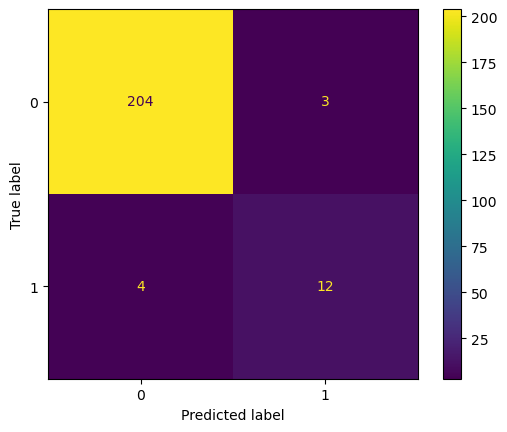

In [82]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)
## Eski

### Yeni Versiyon İçin

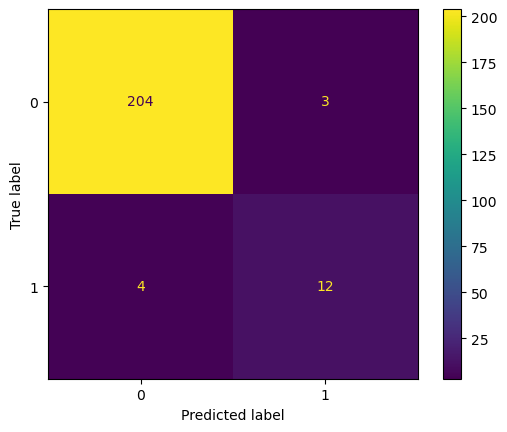

In [83]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test);

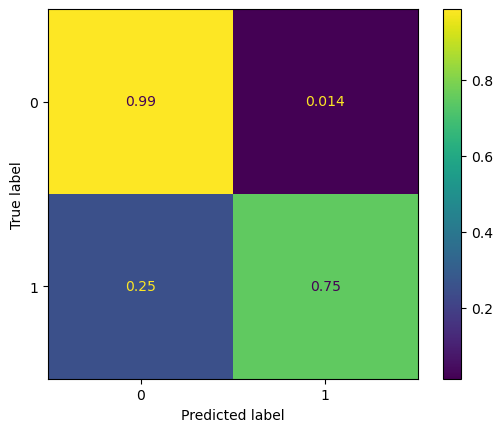

In [84]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test,y_test, normalize="true");

In [85]:
print(classification_report(y_test,legendary_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       207
           1       0.80      0.75      0.77        16

    accuracy                           0.97       223
   macro avg       0.89      0.87      0.88       223
weighted avg       0.97      0.97      0.97       223



---
### Değerlendirme Eğrisi ve AUC

Eski Değerlendirme Grafikleri

In [86]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


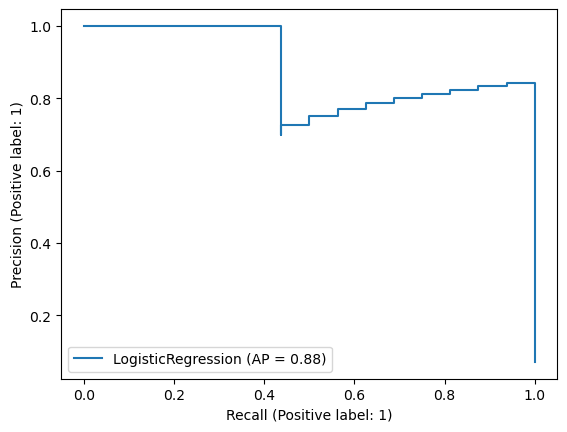

In [87]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


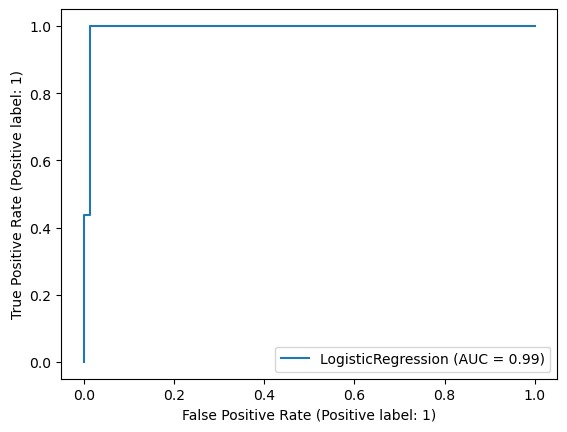

In [88]:
plot_roc_curve(log_model,scaled_X_test,y_test)

Yeni Değerlendirme Grafikleri

In [89]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

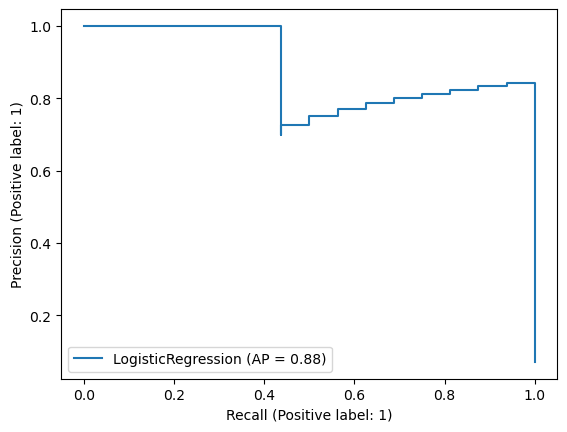

In [90]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test);

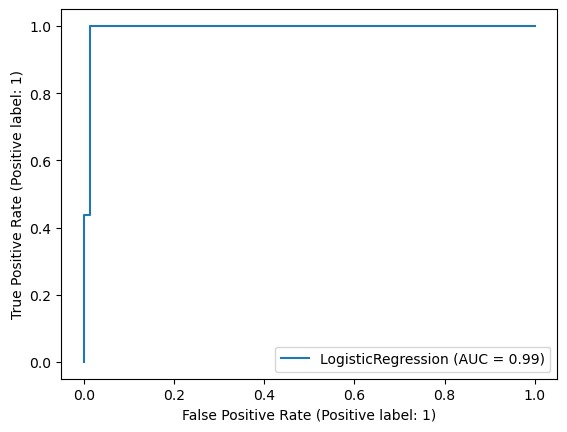

In [91]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

---
---

## Deneme ve Hatalar

In [92]:
df.max()

Total         720
HP            255
Attack        180
Defense       230
Sp. Atk       180
Sp. Def       230
Speed         180
Generation      6
Legendary       1
dtype: int64

In [93]:
poke_1 = [[620,150,130,150,170,100,160,1]]
poke_scaled_1 = scaler.transform(poke_1)
log_model.predict(poke_scaled_1)

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [94]:
(log_model.predict_proba(poke_scaled_1)[0,1])*100

99.99362258037587

In [95]:
poke_2 = [[500,120,50,80,80,100,160,1]]
poke_scaled_2 = scaler.transform(poke_2)
log_model.predict(poke_scaled_2)

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [96]:
(log_model.predict_proba(poke_scaled_2)[0,1])*100

14.433106361855316

In [97]:
print(poke_scaled_1)
print("\n")
print(poke_scaled_2)

[[ 1.7671696   3.36172392  1.79628233  2.73532455  3.30799676  1.14047033
   3.34478777 -1.45417918]]


[[ 0.69293802  2.12274173 -0.89279798  0.29393449  0.32315065  1.14047033
   3.34478777 -1.45417918]]


### Hatalı Pokeler

In [98]:
wrong = (y_test != legendary_pred)

In [99]:
wrong_df = pd.DataFrame(wrong)

In [100]:
wrong_df

,Legendary
637,False
91,False
302,False
281,False
30,False
...,...
670,False
671,False
705,False
606,False


In [101]:
wrong_df[wrong_df["Legendary"] == True]

,Legendary
667,True
649,True
489,True
737,True
725,True
651,True
646,True


In [102]:
df.iloc[737]

Total         600
HP            108
Attack        100
Defense       121
Sp. Atk        81
Sp. Def        95
Speed          95
Generation      6
Legendary       1
Name: 737, dtype: int64

In [103]:
df.loc[[667,737]]

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
667,600,71,120,95,120,95,99,5,0
737,600,108,100,121,81,95,95,6,1


<AxesSubplot:>

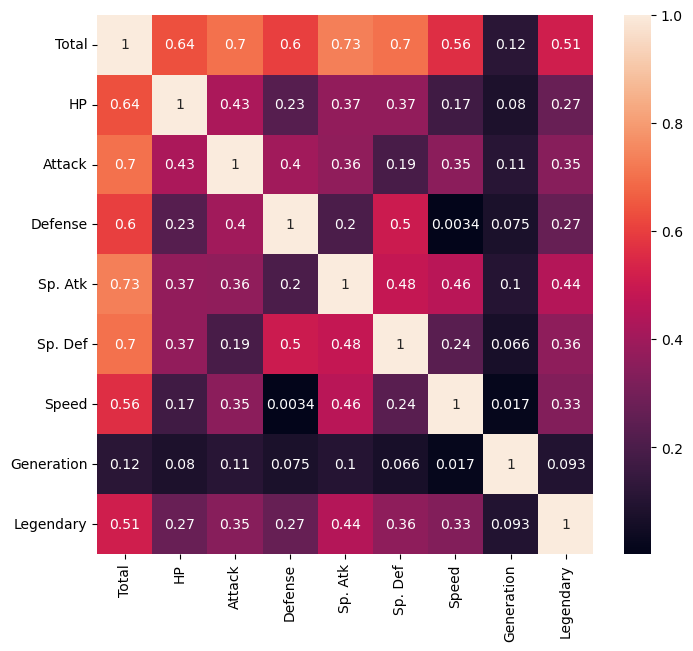

In [104]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True)

---
---
# **"I see now that the circumstances of one's birth is irrelevent,it is what you do with the gift of life that determines who you are."**
-MEWTWO

# **https://www.youtube.com/watch?v=UQoGyeeT2pw**